In [21]:
import MarineDNA_RAPIDS as md
import cudf
import cupy as cp
import cuml
from cuml import AgglomerativeClustering as aggclust
from cuml.decomposition import PCA
import numpy as np
import plotly.express as px

#import pandas as pd
#import sklearn as skl
#from sklearn.cluster import AgglomerativeClustering

In [22]:
file1 = "../../../Data/Flyer2018_16S_table_counts.tsv"
asvs1 = cudf.read_csv(file1, index_col=0, sep="\t")

In [23]:
def ranRelPct(df, asLogOdds = True):
    result = df.copy()
    for i in range(df.shape[1]):
        col = df.iloc[:,i]
        a = col + 1
        b = col.sum() - col + 1
        beta_dist = cp.random.beta(a,b)
        beta_dist /= beta_dist.sum()
        result.iloc[:,i] = beta_dist
    # convert to log-odds if requested
    if asLogOdds:
        # need to use numpy for this transformation not cupy
        result = np.log(result / (1 - result))
    return result.transpose()

In [24]:
# one random draw
ran_lo = md.ranRelPct(asvs1)
ran_lo

,495c1bd1608a1dad54d3e2824ce899ef,a900b6678ce86851fb16bfafb87f3326,c8e360969108fa2125a3d56eb4dad24f,72143fd9e63fe40c1258948d2f0d79c3,7b6b178fad5599c0e9a734e4fb09fd64,4bbec3bb723375416616a87d785ac74a,0c35cfa523aa27921ef8544a16d1cd36,7ec69f2c62aad60e060e588ef687bdd0,61e9a50f4346bb3a5b16179b8eca71fa,a140195871278e8fcf9447e42bad8786,...,995cc65bcfa53a868c42615004e99ad3,46b90aab075ecd8e4db549da708550d8,c4e1933274329209b7cf24daf18dfe0d,aa9e141a5e2781d280406c513bf34d45,d7682f536589fc5f920533513dd0002b,674933a0d44342a0647f7a5b4591f26e,bebe1b9a7e9aaa78172c1208111f4570,0128431733f67d02efad766d717fe6fd,41102a7dd1f4647ba5477c947daabc0e,51440f89c391fb32f9ee895db22bf8f8
CN18Fc12_8_eDNA,-2.402074,-3.490717,-3.784002,-3.886529,-3.711261,-4.677608,-7.266085,-4.257749,-3.478644,-4.224144,...,-9.147011,-13.097670,-7.458116,-8.676306,-10.638815,-10.068675,-9.092338,-9.894179,-9.214627,-8.804530
CN18Fc19_5_eDNA,-1.585746,-3.074170,-2.969887,-3.120578,-3.181473,-4.475288,-5.253461,-4.317067,-4.073528,-3.825368,...,-10.075962,-11.671836,-12.399655,-10.433967,-10.621924,-10.063614,-13.857385,-9.563822,-11.168945,-11.112942
CN18Fc21_6_eDNA,-1.875454,-3.067480,-3.212686,-3.219817,-3.587768,-4.374516,-4.642209,-4.033737,-3.749748,-3.983546,...,-14.214298,-10.518399,-10.929510,-10.943070,-16.252094,-12.379283,-11.185760,-10.538782,-11.939503,-12.193877
CN18Fc22_6_eDNA,-1.689710,-3.218527,-3.195757,-3.171582,-3.297811,-4.605804,-5.080229,-4.193843,-3.968792,-4.027630,...,-11.709872,-12.219002,-10.694165,-12.583330,-11.782047,-11.246520,-10.036828,-13.358864,-10.381750,-12.708571
CN18Fc24_6_eDNA,-1.875251,-3.450444,-3.081295,-3.149868,-3.389744,-4.228975,-5.201350,-4.080325,-3.817355,-4.181282,...,-10.457152,-10.802869,-11.176728,-12.798423,-10.372606,-10.914674,-10.629893,-14.930447,-14.409034,-10.505408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN18SESPkoa_SC42,-3.032680,-1.608062,-6.682953,-6.008040,-6.331814,-4.543212,-3.014132,-5.681572,-6.267176,-5.303297,...,-11.832149,-13.313950,-11.806601,-11.799272,-12.329835,-10.956852,-10.377181,-13.875120,-11.334859,-11.064012
CN18SESPkoa_SC44,-5.779112,-4.438372,-4.957342,-5.085617,-4.931281,-3.207863,-9.286961,-3.436397,-5.477660,-10.763444,...,-8.016053,-9.391042,-10.954519,-10.201096,-8.683704,-10.797071,-8.968640,-7.953776,-10.248915,-8.818672
CN18SESPkoa_SC45,-3.200072,-1.645035,-7.680948,-6.316834,-6.886994,-4.994566,-2.857763,-6.215196,-6.486688,-5.699816,...,-10.002541,-10.316612,-9.675137,-10.861858,-12.447037,-9.684577,-10.457763,-18.015313,-10.525585,-13.463480
CN18SESPkoa_SC47,-3.478741,-1.722991,-7.515543,-6.311038,-6.618916,-5.324538,-3.146956,-6.600898,-6.736287,-5.577953,...,-10.775152,-11.337768,-10.845074,-9.723058,-10.212860,-10.572641,-10.565357,-12.196615,-13.678918,-12.153876


In [32]:
def doClustering(df, num_clusts, num_pcs = None):
    agg_clust = aggclust(n_clusters = num_clusts, affinity = "euclidean", 
                         linkage = "single", output_type="cudf")
    labels = agg_clust.fit_predict(df)
    return labels.astype(int)

In [34]:
# Hierarchical clustering of random log-odds draw
labels = doClustering(ran_lo, 3).to_cupy()
print(labels)
print()
print(cudf.DataFrame(cp.array(cp.unique(labels, return_counts=True)).T))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 2 1 0 1 0 1 0 1 1 1]

   0   1
0  0  48
1  1  13
2  2   1


In [35]:
def doPCA(df, num_pcs = None):
    max_pcs = min(df.shape[0] - 1, df.shape[1] - 1)
    if num_pcs is None:
        num_pcs = max_pcs
    elif num_pcs > max_pcs:
        num_pcs = max_pcs
    pca = PCA(n_components = num_pcs)
    pca_fit = pca.fit(df)
    pca_results = {
        "scores": pca_fit.transform(df),
        "loadings": np.transpose(pca_fit.components_)
    }
    return pca_results

In [43]:
scores = doPCA(ran_lo)["scores"]
scores

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
CN18Fc12_8_eDNA,26.633125,81.008242,37.643277,13.318918,-6.444128,4.257501,-1.641300,-1.894444,-5.476461,-1.114083,...,4.235449,-10.518119,-9.436984,23.012666,4.884406,-4.566032,3.240318,-7.986310,-6.030244,-5.553163
CN18Fc19_5_eDNA,-19.430991,6.336744,7.883806,0.638402,6.017583,-7.454463,6.061775,-6.416460,19.271632,-4.240084,...,-6.277418,0.488903,5.676441,-0.842434,16.274325,-5.885582,-5.431640,-1.000835,18.951263,6.866653
CN18Fc21_6_eDNA,-25.417937,-13.558568,9.535080,11.283990,-7.808565,-12.060478,5.318536,-6.466850,4.095472,-10.776201,...,4.704645,-12.528844,-3.981617,0.619974,-10.364353,-1.970343,5.254757,10.868783,9.271278,1.797001
CN18Fc22_6_eDNA,-22.443585,-5.083674,6.991064,1.596799,3.230142,-10.682107,5.224916,-9.465627,7.698258,-13.280346,...,20.007526,-3.952385,-5.780538,-6.094470,-0.977828,-8.118280,-1.962383,-1.936196,-1.329840,2.586476
CN18Fc24_6_eDNA,-25.675394,0.637582,10.323905,8.190665,6.766119,-3.462494,8.534896,2.824094,11.215545,11.963531,...,-12.237606,3.376856,-12.173078,6.058940,4.058842,18.594722,13.185003,7.782146,-9.309658,0.012925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN18SESPkoa_SC42,67.431675,-23.099000,1.028447,3.908635,1.324678,-3.411786,-18.506041,-2.551439,-3.789146,-9.483929,...,-4.699402,-2.217623,-1.119132,0.887859,-7.929645,8.839734,2.583012,-0.542581,-2.500127,2.968015
CN18SESPkoa_SC44,33.783033,93.854828,10.960167,8.370723,-13.384891,2.297346,1.043533,17.321072,-8.188014,-3.951064,...,0.290130,1.818614,2.023168,-1.741815,1.699487,-5.243689,11.692389,-0.624574,5.700194,8.457555
CN18SESPkoa_SC45,66.553362,-18.875990,7.699308,-0.487302,1.084516,-6.743879,3.251372,-5.148708,-3.739578,-16.025225,...,3.376532,-0.314077,6.430268,-8.639379,-9.895881,0.050153,-1.985651,3.660580,-13.389273,0.563855
CN18SESPkoa_SC47,70.734854,-23.522454,9.614742,-2.601888,-0.412628,-1.372254,4.328467,-0.429163,0.317482,-24.934225,...,-4.459568,3.148394,-4.788108,-2.835120,-3.459106,8.385833,-2.283138,-1.577903,3.857636,-2.392391


In [45]:
#labels = labels.astype()
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [46]:
# Visualize clustering on first 2 PC axes
scores = doPCA(ran_lo)["scores"]
scores["labels"] = labels
fig = px.scatter(
    scores,
    x = 0,
    y = 1,
    color = "labels"
)
fig.show()

TypeError: Implicit conversion to a host NumPy array via __array__ is not allowed, To explicitly construct a GPU matrix, consider using .to_cupy()
To explicitly construct a host matrix, consider using .to_numpy().

In [11]:
# Run sampleClust function n_rep times to assign n_clust clusters
n_clust = 8
n_rep = 10
 
cluster_samples = [md.doClustering(md.ranRelPct(asvs1), n_clust) for i in range(n_rep)]
cluster_samples = pd.DataFrame(cluster_samples).transpose()
cluster_samples

,0,1,2,3,4,5,6,7,8,9
0,3,3,3,7,3,3,3,7,3,7
1,0,4,6,6,0,2,0,6,0,0
2,4,0,0,5,5,7,6,2,5,2
3,0,0,0,5,0,2,2,6,5,6
4,4,0,0,5,0,7,2,6,5,2
...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,1,1,4,1,1,1
58,3,3,3,7,3,3,3,7,3,7
59,1,1,1,0,1,1,4,1,1,1
60,1,1,1,0,1,1,4,1,1,1


In [12]:
# A function to test if row pws[0] is the same cluster as row pws[1] in column 'col'
def isSameCluster(pws, df, col):
    return df.iloc[pws[0], col] == df.iloc[pws[1], col]

print(isSameCluster((1, 3), cluster_samples, 0))
print(isSameCluster((0, 3), cluster_samples, 0))

True
False


In [13]:
(62 * 61) / 2

1891.0

In [14]:
# Code to test if each pair of rows ((n^2 - 1)/2) = 1891) are the same for all columns
import itertools
pws_rows = itertools.combinations(range(cluster_samples.shape[0]), 2)

pws_same = pd.DataFrame([[isSameCluster(pair, cluster_samples, col) for col in range(cluster_samples.shape[1])] for pair in pws_rows])
pws_same

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1886,False,False,False,False,False,False,False,False,False,False
1887,False,False,False,False,False,False,False,False,False,False
1888,True,True,True,True,True,True,True,True,True,True
1889,True,True,True,True,True,True,True,True,True,True


In [15]:
# Function to return maximum number of values that are the same in a each row
def maxSame(row):
    return row.value_counts().max()

print(maxSame(pws_same.iloc[0, :]))
print(maxSame(pws_same.iloc[1890, :]))

10
10


In [16]:
# Code to return the percent of all values that were the same by row
num_same = [maxSame(pws_same.iloc[row, :]) for row in range(pws_same.shape[0])]
np.sum(num_same) * 100 / (pws_same.shape[0] * pws_same.shape[1])

92.00423056583818

In [17]:
# Putting it all together...

# Function to create n_rep draws of df and assign n_clusters and returns percent of draws that had same relative cluster assignments
def pctSame(df, n_clust, n_rep):
    if n_clust >= df.shape[0]:
        return 100
    
    def isSameCluster(pws, df, col):
        return df.iloc[pws[0], col] == df.iloc[pws[1], col]
    
    def maxSame(row):
        return row.value_counts().max()
    
    # cluster a random sample of logit(relative percentages)
    cluster_samples = [md.doClustering(md.ranRelPct(df), n_clust) for i in range(n_rep)]
    cluster_samples = pd.DataFrame(cluster_samples).transpose()
    # unique pairs of rows
    pws_rows = itertools.combinations(range(cluster_samples.shape[0]), 2)
    # identify pairs of samples that are in the same cluster (True) or in different clusters (False)
    pws_same = pd.DataFrame([[isSameCluster(pair, cluster_samples, col) for col in range(cluster_samples.shape[1])] for pair in pws_rows])
    # get the maximum number replicates that have the same value (True or False) for each sample
    num_same = [maxSame(pws_same.iloc[row, :]) for row in range(pws_same.shape[0])]
    # convert to percentage with maximum of same value across all replicates
    return np.sum(num_same) * 100 / (pws_same.shape[0] * pws_same.shape[1])

In [13]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 50
num_clust = np.arange(2, asvs1.shape[1] + 1)
pct_same = [pctSame(asvs1, x, n_rep) for x in num_clust]

CPU times: user 7min 49s, sys: 6.64 s, total: 7min 55s
Wall time: 7min 55s


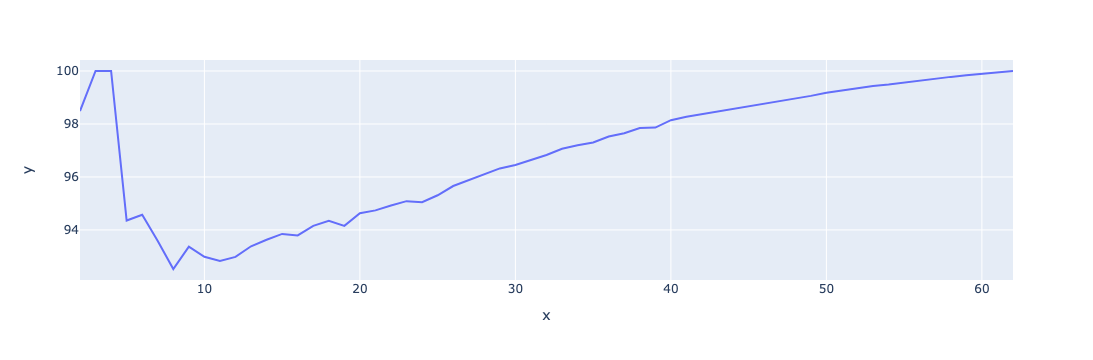

In [14]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust, y = pct_same)